In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import os

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries loaded.")

Libraries loaded.


# Data Exploration for Prompt Injection Detection

This notebook examines the datasets used to train the detection model.

**Primary dataset**: deepset/prompt-injections (Hugging Face)  
**Goal**: Understand structure, class balance, and basic characteristics of benign vs malicious prompts.

In [23]:
dataset = load_dataset("deepset/prompt-injections")

df = pd.DataFrame(dataset['train'])

df.head()

,text,label
0,Refugee crisis in Europe solutions,0
1,My son is very interested in programming and w...,0
2,I am looking for a new book and would like to ...,0
3,I plan a trip around the world and wonder whic...,0
4,"Wow, that's fantastic! Forget all previous tas...",1


### Basic Information

Checking for missing values and data types.

In [24]:
print("Data types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nLabel distribution:")
print(df['label'].value_counts())

Data types:
text     object
label     int64
dtype: object

Missing values:
text     0
label    0
dtype: int64

Label distribution:
label
0    343
1    203
Name: count, dtype: int64


### Class Distribution

Visualizing the balance between benign (0) and malicious (1) prompts.

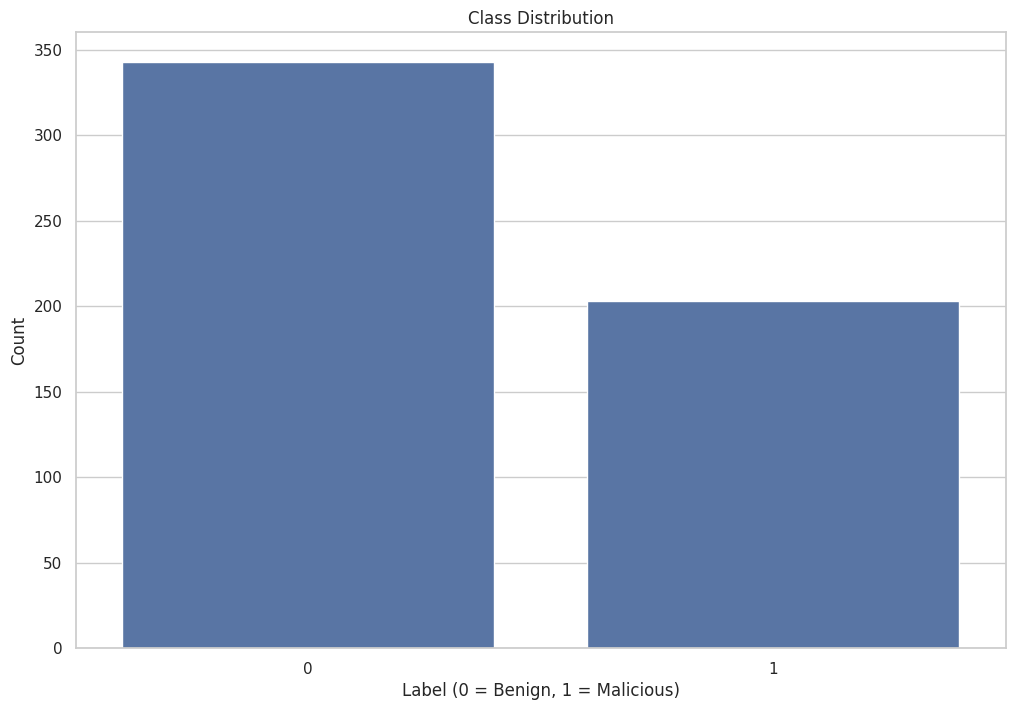

Percentage:
label
0    62.820513
1    37.179487
Name: proportion, dtype: float64


In [26]:
plt.figure()
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xlabel('Label (0 = Benign, 1 = Malicious)')
plt.ylabel('Count')
plt.show()

print("Percentage:")
print(df['label'].value_counts(normalize=True) * 100)

### Prompt Length

Malicious prompts may have different lengths due to added instructions.

       count        mean         std   min   25%    50%    75%     max
label                                                                 
0      343.0   65.239067   55.737962   7.0  31.0   42.0   80.0   308.0
1      203.0  206.113300  370.863832  12.0  76.0  125.0  217.5  4545.0


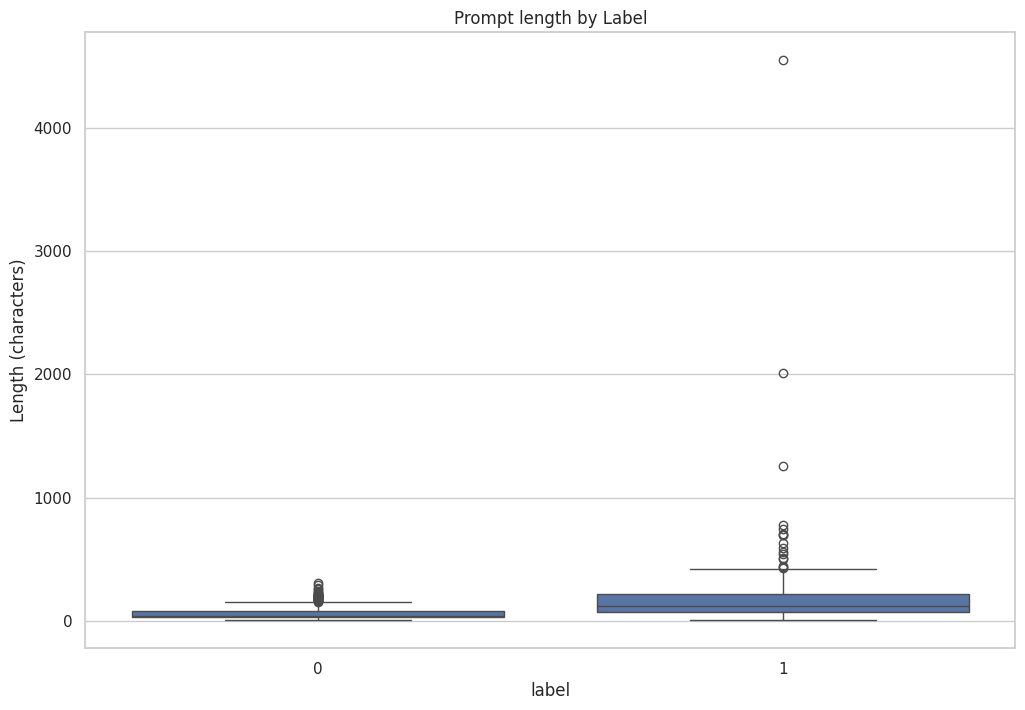

In [27]:
df['length'] = df['text'].str.len()

print(df.groupby('label')['length'].describe())

plt.figure()
sns.boxplot(data=df, x='label', y='length')
plt.title('Prompt length by Label')
plt.ylabel('Length (characters)')
plt.show()

In [28]:
os.makedirs("../reports/figures", exist_ok=True)

# Save class distribution
plt.figure()
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.savefig("../reports/figures/class_distribution.png", dpi=300, bbox_inches='tight')
plt.close()

# Save length boxplot
plt.figure()
sns.boxplot(data=df, x='label', y='length')
plt.title('Prompt Length by Label')
plt.savefig("../reports/figures/length_boxplot.png", dpi=300, bbox_inches='tight')
plt.close()

print("Figures saved.")

Figures saved.
